# Gender Classification Analysis

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Loading files

In [3]:
gender_m = pd.read_csv("Gender-classification-F.csv")
gender_m.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
gender_f = pd.read_csv("Gender-classification-M.csv")
gender_f.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Warm,R&B and soul,Wine,Other,M
1,Neutral,Hip hop,Beer,7UP/Sprite,M
2,Warm,Electronic,Other,Coca Cola/Pepsi,M
3,Neutral,Rock,NaN,Coca Cola/Pepsi,M
4,Cool,Pop,Other,Fanta,M


## Combining the two tables into one

In [5]:
gender_class = pd.concat([gender_m, gender_f], ignore_index=True)
gender_class

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
67,Cool,Rock,Wine,Coca Cola/Pepsi,M
68,Cool,Electronic,Beer,Coca Cola/Pepsi,M
69,NaN,NaN,NaN,NaN,NaN
70,Warm,Rock,Vodka,7UP/Sprite,M


## Cleaning up the datas

In [6]:
# Checking data's info

gender_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        70 non-null     object
 1   Favorite Music Genre  70 non-null     object
 2   Favorite Beverage     56 non-null     object
 3   Favorite Soft Drink   70 non-null     object
 4   Gender                70 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [7]:
gender_class = gender_class.dropna(how="all")

In [8]:
gender_class[gender_class["Favorite Beverage"].isnull()]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
5,Warm,Jazz/Blues,NaN,Fanta,F
19,Cool,Pop,NaN,7UP/Sprite,F
27,Cool,Pop,NaN,Other,F
28,Cool,Pop,NaN,Coca Cola/Pepsi,F
29,Cool,Electronic,NaN,Fanta,F
39,Neutral,Rock,NaN,Coca Cola/Pepsi,M
44,Neutral,Pop,NaN,7UP/Sprite,M
45,Warm,R&B and soul,NaN,Coca Cola/Pepsi,M
51,Cool,Rock,NaN,Other,M
53,Cool,R&B and soul,NaN,Coca Cola/Pepsi,M


In [9]:
# Replacing null values as doesn't drink

gender_class["Favorite Beverage"] = gender_class["Favorite Beverage"].fillna(value="doesn't drink")

C:\Users\User\AppData\Local\Temp\ipykernel_9772\4192296095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_class["Favorite Beverage"] = gender_class["Favorite Beverage"].fillna(value="doesn't drink")


In [10]:
# Checking whether the values are correctly filled

gender_class[gender_class["Favorite Beverage"].isnull()]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender


In [11]:
# Checking data types

gender_class.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [12]:
# Changing data type

gender_class["Gender"] = gender_class["Gender"].astype("category")

C:\Users\User\AppData\Local\Temp\ipykernel_9772\871324500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_class["Gender"] = gender_class["Gender"].astype("category")


In [13]:
gender_class.nunique()

Favorite Color          3
Favorite Music Genre    7
Favorite Beverage       6
Favorite Soft Drink     4
Gender                  2
dtype: int64

In [14]:
gender_class

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
66,Neutral,Hip hop,doesn't drink,Fanta,M
67,Cool,Rock,Wine,Coca Cola/Pepsi,M
68,Cool,Electronic,Beer,Coca Cola/Pepsi,M
70,Warm,Rock,Vodka,7UP/Sprite,M


# Extracting datas

In [15]:
# What are the numbers of Male and Female?

gender_class["Gender"].value_counts()

Gender
F    35
M    35
Name: count, dtype: int64

<Axes: xlabel='Gender'>

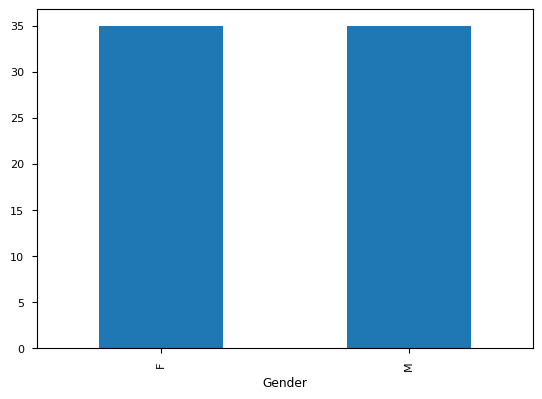

In [16]:
plt.style.use("seaborn-v0_8-paper")
gender_class["Gender"].value_counts().plot(kind="bar")

In [22]:
# How many proportion of female and male like different color?

gender_class.groupby("Gender")["Favorite Color"].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_9772\3344300600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_class.groupby("Gender")["Favorite Color"].value_counts()


Gender  Favorite Color
F       Cool              17
        Warm              15
        Neutral            3
M       Cool              20
        Warm              11
        Neutral            4
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_9772\998122190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_class.groupby("Gender")["Favorite Color"].value_counts().plot(kind="bar")


<Axes: xlabel='Gender,Favorite Color'>

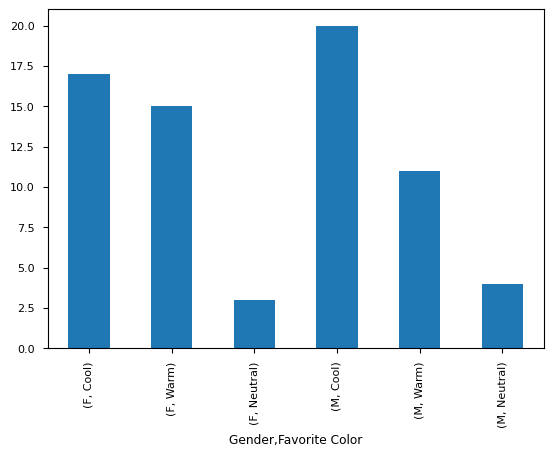

In [27]:
gender_class.groupby("Gender")["Favorite Color"].value_counts().plot(kind="bar")

In [28]:
# The different taste of music between male and female

gender_class["Favorite Music Genre"].value_counts()

Favorite Music Genre
Rock                21
Pop                 18
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     5
Jazz/Blues           4
Name: count, dtype: int64

<Axes: ylabel='count'>

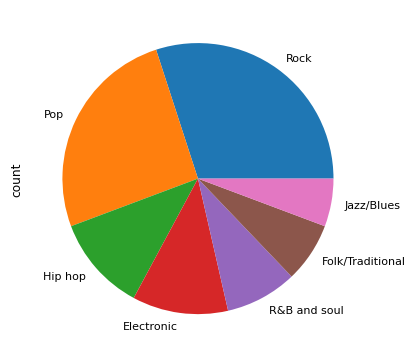

In [62]:
gender_class["Favorite Music Genre"].value_counts().plot(kind="pie")

In [60]:
gender_class.groupby("Gender")["Favorite Music Genre"].value_counts(normalize=True)*100

C:\Users\User\AppData\Local\Temp\ipykernel_9772\1032679873.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_class.groupby("Gender")["Favorite Music Genre"].value_counts(normalize=True)*100


Gender  Favorite Music Genre
F       Pop                     40.000000
        Rock                    31.428571
        Jazz/Blues               8.571429
        Electronic               5.714286
        Folk/Traditional         5.714286
        R&B and soul             5.714286
        Hip hop                  2.857143
M       Rock                    28.571429
        Hip hop                 20.000000
        Electronic              17.142857
        Pop                     11.428571
        R&B and soul            11.428571
        Folk/Traditional         8.571429
        Jazz/Blues               2.857143
Name: proportion, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_9772\3733803857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_class.groupby("Gender")["Favorite Music Genre"].value_counts().plot(kind="bar")


<Axes: xlabel='Gender,Favorite Music Genre'>

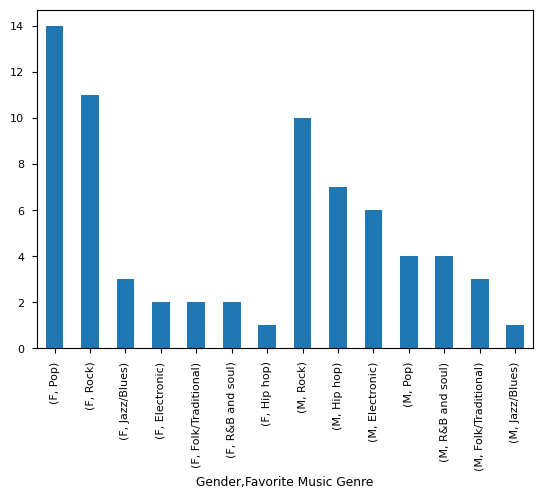

In [56]:
gender_class.groupby("Gender")["Favorite Music Genre"].value_counts().plot(kind="bar")

In [67]:
# Male & Female who are non-alcohol

male = gender_class["Gender"] == "M"
who_doesnot_drink = gender_class["Favorite Beverage"] == "doesn't drink"
gender_class[male & who_doesnot_drink]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
39,Neutral,Rock,doesn't drink,Coca Cola/Pepsi,M
44,Neutral,Pop,doesn't drink,7UP/Sprite,M
45,Warm,R&B and soul,doesn't drink,Coca Cola/Pepsi,M
51,Cool,Rock,doesn't drink,Other,M
53,Cool,R&B and soul,doesn't drink,Coca Cola/Pepsi,M
54,Cool,Rock,doesn't drink,Coca Cola/Pepsi,M
55,Cool,Hip hop,doesn't drink,Other,M
57,Cool,Electronic,doesn't drink,Fanta,M
66,Neutral,Hip hop,doesn't drink,Fanta,M


In [69]:
female = gender_class["Gender"] == "F"
gender_class[female & who_doesnot_drink]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
5,Warm,Jazz/Blues,doesn't drink,Fanta,F
19,Cool,Pop,doesn't drink,7UP/Sprite,F
27,Cool,Pop,doesn't drink,Other,F
28,Cool,Pop,doesn't drink,Coca Cola/Pepsi,F
29,Cool,Electronic,doesn't drink,Fanta,F
